In [2]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

import PyLasMech as plm

### Read well log datas

In [3]:
LogFiles=plm.FileFinder("../Data/PetrophysicsTVD")

[IO] Found 9 log files


,FileName,Location
0,15_9-F-1 B_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-1 B_TVDlog.las
1,15_9-F-1 C_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-1 C_TVDlog.las
2,15_9-F-11 B_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-11 B_TVDlog.las
3,15_9-F-12_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-12_TVDlog.las
4,15_9-F-14_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-14_TVDlog.las
5,15_9-F-15 C_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-15 C_TVDlog.las
6,15_9-F-15 D_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-15 D_TVDlog.las
7,15_9-F-4_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-4_TVDlog.las
8,15_9-F-5_TVDlog.las,..\Data\PetrophysicsTVD\15_9-F-5_TVDlog.las


In [4]:
WellLog=plm.ReadLas(LogFiles[0])
#Print las file summary table
plm.printLas(WellLog)

[IO] Reading F:\Course\PETE 4241\Projects\Data\PetrophysicsTVD\15_9-F-1 B_TVDlog.las.....
[Warnning] No intersection! Get union!
Done!
[LAS Info]
Well Name= 15_9-F-1 B
Start/Step/End Depth=(145.900000:0.100000:3464.900000)
NULL value= -999.25
Common Depth= (145.9, 3464.9)


,Curves,Available Depth (Non-NULL),Raw Min/Max Val,Unit,Comments
0,DEPTH,"[145.9, 3464.9]","[145.9, 3464.9]",m,0 Depth
1,ABDCQF01,"[3120.0, 3442.5]","[2.1046, 3.0577]",g/cm3,1 ABDCQF01:COMPOSITE:rC:NONE:v1
2,ABDCQF02,"[3120.0, 3442.5]","[2.1182, 3.0521]",g/cm3,2 ABDCQF02:COMPOSITE:rC:NONE:v1
3,ABDCQF03,"[3120.0, 3442.5]","[2.0902, 3.0505]",g/cm3,3 ABDCQF03:COMPOSITE:rC:NONE:v1
4,ABDCQF04,"[3120.0, 3442.5]","[2.1247, 3.0866]",g/cm3,4 ABDCQF04:COMPOSITE:rC:NONE:v1
5,BS,"[145.9, 3464.9]","[8.5, 36.0]",inches,5 BS:COMPOSITE:rC:NONE:v1
6,CALI,"[3090.0, 3441.8]","[8.3604, 10.1917]",inches,6 CALI:COMPOSITE:rC:NONE:v1
7,DRHO,"[3090.0, 3442.5]","[-0.0225, 0.2206]",g/cm3,7 DRHO:COMPOSITE:rC:NONE:v1
8,DT,"[2998.5, 3424.6]","[54.9283, 125.9827]",us/ft,8 DT:COMPOSITE:rC:NONE:v1
9,DTS,"[2999.0, 3424.7]","[99.9092, 202.14]",us/ft,9 DTS:COMPOSITE:rC:NONE:v1


### Geomechanical properties calculation

> ##### Parameter and unit setup

In [5]:
#Unit Converter
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
meter=1
mega=1e6 #Mega
Pa=1 #Pa
us=0.000001 #us, micro seconds
psi=6894.76

#Basic paramters for Volve field
rho_w=1.0*g_cm3  #formation fluid density
rho_m=2.65*g_cm3 #rock matrix density
z_w=80*meter # ocean water depth @ https://www.offshore-technology.com/projects/volve-oil-field-north-sea/
RHOB_avg=1.75*g_cm3 # average bulk density above the reservoir, Z<2576 ft
phi0=0.37
beta=0.0266*(1/mega*Pa) #convert it unit back to Pa


#RHOB DT DTS etc from Log
l=WellLog
param=l.plm_param
GeoMechParams={}


#RHOB DT DTS etc from Log
NonNanIndex=param.getCommonNonNanIndex(l,["RHOB","DT","DTS","TVD"])

DZ=l["TVD"][NonNanIndex]
#Auto unit setup
DZ_unit=param.Units[param.getCurveIndex("TVD")]
if(DZ_unit.lower()=="ft"): DZ=DZ*ft
elif(DZ_unit.lower()=="m"): DZ=DZ*meter
else:print("!!!Unknown Unit!!!!")
    
if("RHOB" in param.CurveNames): 
    RHOB=l["RHOB"][NonNanIndex]
    #Auto unit
    unit=param.Units[param.getCurveIndex("RHOB")]
    if(unit=="g/cm3"): RHOB=RHOB*g_cm3
    else:print("!!!Unknown Unit!!!!",unit)    
if("DT" in param.CurveNames): 
    DT=l["DT"][NonNanIndex]
    #Auto unit
    unit=param.Units[param.getCurveIndex("DT")]
    if(unit=="us/ft"): DT=DT*us/ft
    else:print("!!!Unknown Unit!!!!",unit)  
if("DTS" in param.CurveNames): 
    DTS=l["DTS"][NonNanIndex]
    #Auto unit
    unit=param.Units[param.getCurveIndex("DTS")]
    if(unit=="us/ft"): DTS=DTS*us/ft
    else:print("!!!Unknown Unit!!!!",unit)   

DTS [Warning] has 449 NAN values in between


> ##### Principle stress & its gradient
$$
S_v=\rho _wgz_w+\bar{\rho}_bg\left( z_0-z_w \right) +\int_{z_0-z_w}^z{\rho _b\left( z \right) gdz}
$$
$$
S_{hmin}=0.84S_v
$$
$$
S_{hmax}=0.89S_v
$$

In [8]:
z_0=DZ[0]

#1. Overburden stress
Sv0=rho_w*g*z_w+RHOB_avg*g*(z_0-z_w)
Sv=[Sv0]+list(Sv0+integrate.cumtrapz(RHOB*g, DZ))
GeoMechParams["Sv"]=np.array(Sv)
GeoMechParams["Sv_grad"]=GeoMechParams["Sv"]/DZ

GeoMechParams["Shmin"]=0.84*GeoMechParams["Sv"]
GeoMechParams["Shmax"]=0.89*GeoMechParams["Sv"]

plm.showTable([DZ/1e3,GeoMechParams["Sv"]/1e6,GeoMechParams["Shmin"]/1e6,GeoMechParams["Shmax"]/1e6],
              ['Depth_GOM(km)','Sv(MPa)','Shmin(MPa)','Shmax(MPa)'],preview=10)

|    |   Depth_GOM(km) |   Sv(MPa) |   Shmin(MPa) |   Shmax(MPa) |
|----|-----------------|-----------|--------------|--------------|
|  0 |         2.90287 |   49.1962 |      41.3248 |      43.7846 |
|  1 |         2.93319 |   49.9587 |      41.9653 |      44.4632 |
|  2 |         2.96385 |   50.7171 |      42.6024 |      45.1382 |
|  3 |         2.99477 |   51.4125 |      43.1865 |      45.7572 |
|  4 |         3.02619 |   52.1702 |      43.823  |      46.4315 |
|  5 |         3.058   |   52.9382 |      44.4681 |      47.115  |
|  6 |         3.0902  |   53.6637 |      45.0775 |      47.7607 |
|  7 |         3.12269 |   54.464  |      45.7498 |      48.473  |
|  8 |         3.15529 |   55.2541 |      46.4134 |      49.1761 |
|  9 |         3.1879  |   56.0419 |      47.0752 |      49.8773 |


> ##### Hydrostatic pressure in MPa.  
The pore pressure can be calculated as follows:  
$${{P}_{p}}={{\bar{\rho }}_{w}}g{z} $$

In [9]:
GeoMechParams["P_pore"]=rho_w*g*DZ

plm.showTable([DZ/1e3,GeoMechParams["P_pore"]/1e6],['Depth_GOM(km)','PorePressure(MPa)'],preview=10)

|    |   Depth_GOM(km) |   PorePressure(MPa) |
|----|-----------------|---------------------|
|  0 |         2.90287 |             28.4481 |
|  1 |         2.93319 |             28.7452 |
|  2 |         2.96385 |             29.0457 |
|  3 |         2.99477 |             29.3487 |
|  4 |         3.02619 |             29.6566 |
|  5 |         3.058   |             29.9684 |
|  6 |         3.0902  |             30.284  |
|  7 |         3.12269 |             30.6024 |
|  8 |         3.15529 |             30.9218 |
|  9 |         3.1879  |             31.2414 |


> ##### Rock porosity
The rock porosity can be calculated using density log as follows:  
$$
\phi =\frac{\rho _m-\rho _b}{\rho _m-\rho _w}
$$

In [10]:
GeoMechParams["PORO"]=(rho_m-RHOB)/(rho_m-rho_w)

plm.showTable([DZ/1e3,GeoMechParams["PORO"]],['Depth_GOM(km)','Porosity'],preview=10)

|    |   Depth_GOM(km) |   Porosity |
|----|-----------------|------------|
|  0 |         2.90287 |  0.0667273 |
|  1 |         2.93319 |  0.0648485 |
|  2 |         2.96385 |  0.064     |
|  3 |         2.99477 |  0.222424  |
|  4 |         3.02619 |  0.0869697 |
|  5 |         3.058   |  0.226061  |
|  6 |         3.0902  |  0.171636  |
|  7 |         3.12269 |  0.197394  |
|  8 |         3.15529 |  0.0693939 |
|  9 |         3.1879  |  0.114848  |


> ##### Porosity by Athy's equation  
The effective vertical stress $\sigma'_v$ can be calculated as follows:
$$\sigma'_v=\sigma_v - p_p $$
The porosity can be calculated as follows:
$$\phi=\phi_0 e^{-\beta \sigma'_v} $$

In [11]:
Sv_eff=GeoMechParams["Sv"]-GeoMechParams["P_pore"]
plm.showTable([DZ/1e3,Sv_eff/1e6],['Depth_GOM(km)','Effective Sv(MPa)'],preview=10)

GeoMechParams["PORO_Athy"]=phi0*np.exp(-beta*Sv_eff)
plm.showTable([DZ/1e3,GeoMechParams["PORO_Athy"]],['Depth_GOM(km)','Porosity_Athy'],preview=10)

|    |   Depth_GOM(km) |   Effective Sv(MPa) |
|----|-----------------|---------------------|
|  0 |         2.90287 |             20.7481 |
|  1 |         2.93319 |             21.2134 |
|  2 |         2.96385 |             21.6714 |
|  3 |         2.99477 |             22.0638 |
|  4 |         3.02619 |             22.5136 |
|  5 |         3.058   |             22.9698 |
|  6 |         3.0902  |             23.3797 |
|  7 |         3.12269 |             23.8617 |
|  8 |         3.15529 |             24.3323 |
|  9 |         3.1879  |             24.8005 |
|    |   Depth_GOM(km) |   Porosity_Athy |
|----|-----------------|-----------------|
|  0 |         2.90287 |        0.213066 |
|  1 |         2.93319 |        0.210445 |
|  2 |         2.96385 |        0.207897 |
|  3 |         2.99477 |        0.205739 |
|  4 |         3.02619 |        0.203292 |
|  5 |         3.058   |        0.200839 |
|  6 |         3.0902  |        0.198662 |
|  7 |         3.12269 |        0.196131 |
|  8 |

> ##### Pore pressure by Athy's equation
The Pore pressure by Athy's can be calculated as follows:  
$$ p_p = \sigma_v +\frac{1}{\beta}\ln{\frac{\phi}{\phi_0}} $$

In [12]:
GeoMechParams["P_pore_Athy"]=GeoMechParams["Sv"]+1/beta*np.log(GeoMechParams["PORO"]/phi0)

plm.showTable([DZ/1e3,GeoMechParams["P_pore_Athy"]/1e6],['Depth_GOM(km)','PorePressure_Athy(MPa)'],preview=10)

|    |   Depth_GOM(km) |   PorePressure_Athy(MPa) |
|----|-----------------|--------------------------|
|  0 |         2.90287 |                -15.1981  |
|  1 |         2.93319 |                -15.5094  |
|  2 |         2.96385 |                -15.246   |
|  3 |         2.99477 |                 32.2803  |
|  4 |         3.02619 |                 -2.26376 |
|  5 |         3.058   |                 34.4157  |
|  6 |         3.0902  |                 24.7868  |
|  7 |         3.12269 |                 30.8437  |
|  8 |         3.15529 |                 -7.66708 |
|  9 |         3.1879  |                 12.0611  |


c:\users\binpc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [13]:
#Fix inf -inf value in data
for name, data in GeoMechParams.items():
        data[data==-np.inf]=np.nan
        data[data==np.inf]=np.nan
        #GeoMechParams[name]=data

In [14]:
plm.appendCurve(l,'Sv', GeoMechParams["Sv"]/1e6, unit='MPa',descr='PyLasMech overburden stress',dataIndex=NonNanIndex)
plm.appendCurve(l,'Shmin', GeoMechParams["Shmin"]/1e6, unit='MPa',descr='PyLasMech min horizontal stress',dataIndex=NonNanIndex)
plm.appendCurve(l,'Shmax', GeoMechParams["Shmax"]/1e6, unit='MPa',descr='PyLasMech max horizontal stress',dataIndex=NonNanIndex)

plm.appendCurve(l,'P_pore', GeoMechParams["P_pore"]/1e6, unit='MPa',descr='PyLasMech pore pressure',dataIndex=NonNanIndex)
plm.appendCurve(l,'PORO', GeoMechParams["PORO"], unit='-',descr='PyLasMech porosity',dataIndex=NonNanIndex)
plm.appendCurve(l,'PORO_Athy', GeoMechParams["PORO_Athy"], unit='-',descr='PyLasMech porosity from Athy',dataIndex=NonNanIndex)
plm.appendCurve(l,'P_pore_Athy', GeoMechParams["P_pore_Athy"]/1e6, unit='MPa',descr='PyLasMech pore pressure from Athy',dataIndex=NonNanIndex)

Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!


> ##### (b) Shear modulus (G,MPa), Possion ratio and Youngs Modulus (E, MPa) only available for DT/DTS
$$
G=\rho_bV_{s}^{2}
\\
\nu =\frac{V_{p}^{2}-2V_{s}^{2}}{2\left( V_{p}^{2}-V_{s}^{2} \right)}
\\
E=2G\left( 1+\nu \right) 
$$

In [15]:
Vp=1/DT
Vs=1/DTS

plm.showTable([DZ/1e3,Vp,Vs],
           ['Depth(km)','$V_p$ (m/s)','$V_s$ (m/s)'])

GeoMechParams["G"]=RHOB*Vs*Vs
GeoMechParams["v"]=(Vp**2-2*Vs**2)/2/(Vp**2-Vs**2)
GeoMechParams["E"]=2*GeoMechParams["G"]*(1+GeoMechParams["v"]) 

plm.showTable([DZ/1e3,GeoMechParams["G"]/1e9,GeoMechParams["v"],GeoMechParams["E"]/1e9],['Depth(km)','G(GPa)','v','E(GPa)'])

|    |   Depth(km) |   $V_p$ (m/s) |   $V_s$ (m/s) |
|----|-------------|---------------|---------------|
|  0 |     2.90287 |       4580.6  |       2129.41 |
|  1 |     2.93319 |       3808.8  |       1945.41 |
|  2 |     2.96385 |       3555.21 |       1859.97 |
|  3 |     2.99477 |       2507.25 |       1713.25 |
|  4 |     3.02619 |       3483.93 |       1787.28 |
|  5 |     3.058   |       3379.79 |       2107.28 |
|  6 |     3.0902  |       3912.72 |       2385.89 |
|  7 |     3.12269 |       3615.44 |       2262.9  |
|  8 |     3.15529 |       4171.12 |       2363.48 |
|  9 |     3.1879  |       4053.82 |       2318.06 |
|    |   Depth(km) |   G(GPa) |         v |   E(GPa) |
|----|-------------|----------|-----------|----------|
|  0 |     2.90287 | 11.5169  | 0.362155  |  31.3756 |
|  1 |     2.93319 |  9.62432 | 0.323516  |  25.4759 |
|  2 |     2.96385 |  8.80233 | 0.311575  |  23.0898 |
|  3 |     2.99477 |  6.7011  | 0.0620508 |  14.2338 |
|  4 |     3.02619 |  8.00671 | 0.

In [16]:
GeoMechParams["UCS"]=np.exp(-6.36+2.45*np.log10(0.86*Vp-1172))*mega*Pa
plm.showTable([DZ/1e3,GeoMechParams["UCS"]/1e6],['Depth(km)','UCS(MPa)'],preview=10)

|    |   Depth(km) |   UCS(MPa) |
|----|-------------|------------|
|  0 |     2.90287 |    7.94898 |
|  1 |     2.93319 |    5.93724 |
|  2 |     2.96385 |    5.28454 |
|  3 |     2.99477 |    2.64612 |
|  4 |     3.02619 |    5.10191 |
|  5 |     3.058   |    4.83581 |
|  6 |     3.0902  |    6.20599 |
|  7 |     3.12269 |    5.43915 |
|  8 |     3.15529 |    6.87725 |
|  9 |     3.1879  |    6.57201 |


In [17]:
#Fix inf -inf value in data
for name, data in GeoMechParams.items():
        data[data==-np.inf]=np.nan
        data[data==np.inf]=np.nan
        #GeoMechParams[name]=data

#plm.appendCurve(l,'G', GeoMechParams["G"]/1e9, unit='GPa',descr='PyLasMech Bulk modulus',dataIndex=NonNanIndex)
plm.appendCurve(l,'v', GeoMechParams["v"], unit='-',descr='PyLasMech possion ratio',dataIndex=NonNanIndex)
plm.appendCurve(l,'E', GeoMechParams["E"]/1e9, unit='GPa',descr='PyLasMech Youngs modulus',dataIndex=NonNanIndex)
plm.appendCurve(l,'UCS', GeoMechParams["UCS"]/1e6, unit='MPa',descr='PyLasMech UCS',dataIndex=NonNanIndex)

Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!
Input data size(3262) < DEPTH size (33191), NULL value (nan) will be added
[Warnning] No intersection! Get union!


### Plot and visulization

	Auto Depth Range= (3098.5, 3424.6) for  ['Sv', 'Shmin', 'Shmax', 'P_pore', 'PORO', 'PORO_Athy', 'P_pore_Athy', 'v', 'E', 'UCS']
	 P_pore_Athy Corrected Min/Max Val [-214.78680697677015, 46.582353299275944]
	 v Corrected Min/Max Val [-0.041885188169573734, 0.378107876031191]
	 E Corrected Min/Max Val [12.431800462799867, 65.48476169426235]
	 UCS Corrected Min/Max Val [2.4304859592580725, 9.582661565201898]


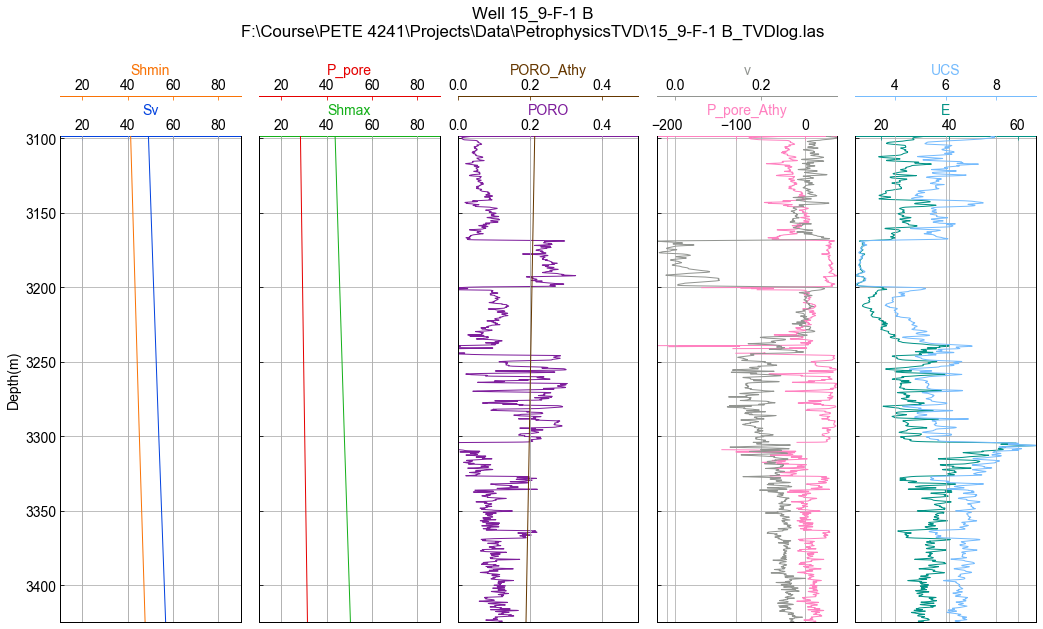

In [19]:
XLims={"P_pore":(10,90),"Sv":(10,90),"Shmax":(10,90),"Shmin":(10,90),"PORO_Athy":(0,0.5),"PORO":(0,0.5)}
fig=plm.plotLogs(LogData=l,CurveNames=GeoMechParams.keys(),XLims=XLims)

### Export to new las file

In [20]:
fpath="../Data/Petrophysics"#Save all new files at the root of petrophysics
fname=WellLog.plm_param.WellName+"_TVD_Geomech.las"
fname=os.path.join(fpath,fname)
print("[IO] Save new log as ",os.getcwd()+fname)
plm.saveLas(WellLog,fname)

[IO] Save new log as  F:\Course\PETE 4241\Projects\FinalCode../Data/Petrophysics\15_9-F-1 B_TVD_Geomech.las
Write Las file @ ../Data/Petrophysics\15_9-F-1 B_TVD_Geomech.las
